<a href="https://colab.research.google.com/github/Anubhav4989/SPPU_DOT_Semester-3-Data-Science-Capstone-Project-NLP-Driven-Email-SMS-Spam-Filtering/blob/main/Semester_3_Data_Science_Capstone_Project_PGD22DS65_%26_PGD22DS44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Semester 3: Data Science Capstone Project**

# **NLP-Driven Email/SMS Spam Filtering**

Mr. Anubhav Kumar Tiwary (Roll No. = PGD22DS65)

Mr. Shubham Varudkar (Roll No. = PGD22DS44)

Guided by:

Mrs. Poonam Bawake, our project guide.

## Problem Statement

This project aims to develop an intelligent spam filtering system for emails and SMS messages using Natural Language Processing (NLP) techniques and machine learning algorithms. The goal is to effectively identify and filter out spam messages from users' inboxes, enhancing communication security and reducing the annoyance of unwanted messages.

## Dataset Information

**Overview**: This dataset is a fusion of two distinct datasets: the "SMS Spam Collection Dataset" and the "Ling-Spam Dataset." The objective is to create a comprehensive dataset for developing an efficient spam filtering system capable of classifying text messages and emails as spam or legitimate (ham).

#### 1.) **SMS Spam Collection Dataset**:

**Source**: This dataset comprises 5,574 SMS messages collected for SMS spam research.

**Content**: Each entry contains two columns - "v1" with labels (ham or spam) and "v2" with the corresponding raw text message.

**Origin**: It includes messages from various sources, such as the Grumbletext website, the NUS SMS Corpus, Caroline Tag's PhD Thesis, and the SMS Spam Corpus v.0.1 Big.

**Acknowledgments**: Researchers have contributed to the study of this dataset, and its usage should be credited to them.
Purpose: This dataset offers a range of SMS messages, allowing for the development of SMS spam filtering models.

#### 2.) **Ling-Spam Dataset**:

**Source**: Curated from the Linguist List, this dataset comprises 2,893 spam and non-spam emails.

**Content**: Header information has been removed, leaving the core email text.

**Composition**: It consists of 2,412 legitimate (ham) emails and 481 spam emails.

**Acknowledgments**: The dataset's availability is attributed to the authors of "A Memory-Based Approach to Anti-Spam Filtering for Mailing Lists."

**Purpose of the Combined Dataset**: By merging these two datasets, our project aims to create a comprehensive and diverse dataset that covers both SMS and email spam. This combined dataset provides a rich source for the development and evaluation of spam filtering models, incorporating various types of spam messages and legitimate communications.

The objective of this project is to leverage Natural Language Processing (NLP) techniques and machine learning algorithms to train a predictive model capable of accurately classifying incoming texts and emails as either spam or legitimate messages. This model will contribute to improving communication security and reducing the inconvenience caused by unwanted messages in both SMS and email channels.

### 1.) Import Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2.) Loading and Data Cleaning

In [3]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# SMS Spam Collection Dataset
df1 = pd.read_csv(r'/content/drive/MyDrive/Dataset/Semester 3_Capstone Project_Datasets/spam.csv', encoding='iso-8859-1')                                      # Google Colab
# df1 = pd.read_csv(r'/content/drive/MyDrive/Dataset/Semester 3_Capstone Project_Datasets/spam.csv', encoding='iso-8859-1')     # VS Code

In [5]:
df1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# List of columns to drop
df1.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
# Renaming the columns
df1.rename(columns={'v1':'LABEL','v2':'BODY'},inplace=True)

In [8]:
# Replace 'ham' with 0 and 'spam' with 1 in the 'LABEL' column
df1['LABEL'] = df1['LABEL'].replace({'ham': 0, 'spam': 1})

In [9]:
df1.head()

,LABEL,BODY
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Ling-Spam Dataset
df2 = pd.read_csv(r'/content/drive/MyDrive/Dataset/Semester 3_Capstone Project_Datasets/messages.csv', encoding='iso-8859-1')                                      # Google Colab
# df2 = pd.read_csv(r'/content/drive/MyDrive/Dataset/Semester 3_Capstone Project_Datasets/messages.csv', encoding='iso-8859-1')     # VS Code

In [11]:
df2.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [12]:
# List of columns to drop
df2.drop(columns=['subject'], inplace=True)

In [13]:
# Renaming the columns
df2.rename(columns={'label':'LABEL','message':'BODY'},inplace=True)

In [14]:
df2.head()

,BODY,LABEL
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0


In [15]:
# Concatenate the DataFrames vertically (along rows)
merged_df = pd.concat([df1, df2], ignore_index=True)

In [16]:
# Save the merged DataFrame to a single CSV file
merged_df.to_csv('merged_dataset.csv', index=False)

In [17]:
merged_df.head()

,LABEL,BODY
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
merged_df.tail()

,LABEL,BODY
8460,1,hello thanks for stopping by ! ! we have taken...
8461,1,"the list owner of : "" kiddin "" has invited you..."
8462,0,"judging from the return post , i must have sou..."
8463,0,gotcha ! there are two separate fallacies in t...
8464,0,hello ! i ' m working on a thesis concerning a...


In [19]:
merged_df.sample(5)

,LABEL,BODY
6662,0,the department of tesl & applied linguistics a...
4410,0,Ya but it cant display internal subs so i gott...
1960,1,Guess what! Somebody you know secretly fancies...
720,0,Oh is it? Send me the address
2070,1,Sexy Singles are waiting for you! Text your AG...


In [20]:
merged_df.shape

(8465, 2)

In [21]:
# from google.colab import files

# # Provide the file name you want to download
# file_name = 'merged_dataset.csv'

# # Trigger the download
# files.download(file_name)

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   8465 non-null   int64 
 1   BODY    8465 non-null   object
dtypes: int64(1), object(1)
memory usage: 132.4+ KB


In [23]:
# Missing Values
merged_df.isnull().sum()

,0
LABEL,0
BODY,0


In [24]:
# Check for duplicate values
merged_df.duplicated().sum()

437

In [25]:
# Remove duplicates
merged_df = merged_df.drop_duplicates(keep = 'first')

In [26]:
# Check for duplicate values
merged_df.duplicated().sum()

0

In [27]:
merged_df.shape

(8028, 2)

### 3.) Exploratory Data Analysis (EDA)

In [28]:
merged_df['LABEL'].value_counts()

,count
LABEL,
0,6917
1,1111


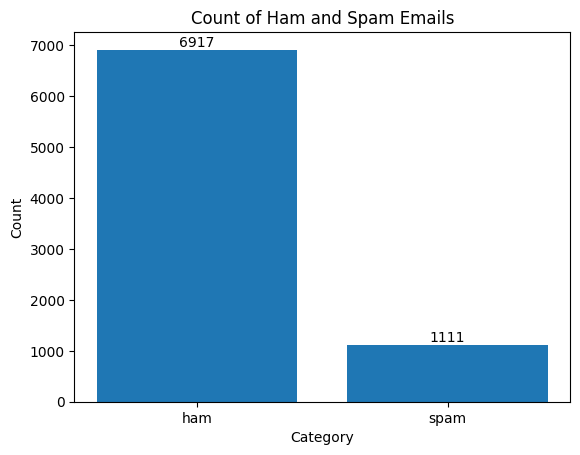

In [29]:
# Sample data
label_counts = merged_df['LABEL'].value_counts()

# Create a bar chart
plt.bar(['ham', 'spam'], label_counts.values)

# Adding labels and formatting
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Ham and Spam Emails')

# Annotate the bar chart with label counts
for index, value in enumerate(label_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

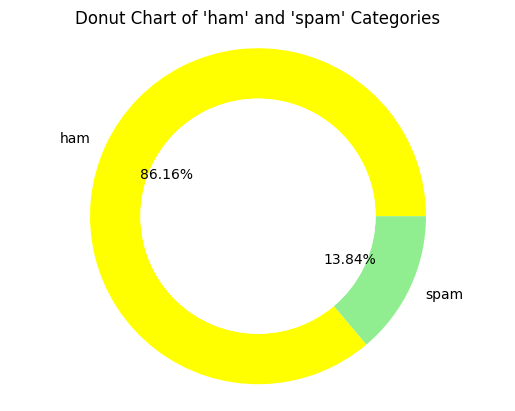

In [30]:
# Assuming merged_df is your DataFrame
# Assuming merged_df['target'] has categories 'ham' and 'spam'

# Count the occurrences of 'ham' and 'spam'
counts = merged_df['LABEL'].value_counts()

# Define custom light colors for 'ham' and 'spam'
colors = ['yellow', 'lightgreen']  # Light yellow and light green

# Create a donut chart (pie chart with a hole in the center)
plt.pie(counts, labels=['ham', 'spam'], autopct="%0.2f%%", colors=colors, wedgeprops=dict(width=0.3))

# Draw a white circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.title("Donut Chart of 'ham' and 'spam' Categories")
plt.show()

The dataset is heavily imbalanced, with the majority class "ham" representing 86.16% of the data, while the minority class "spam" accounts for only 13.84%. This imbalance is typical in real-world scenarios, as spam emails are relatively rare compared to legitimate emails.

In [31]:
import nltk

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

- **Tokenization Tool**: `nltk.download('punkt')` is a tool used for text processing tasks.
- **Tokenization Process**: It helps computers split text into smaller units (tokens), like sentences and words, making it easier to understand.
- **Using NLTK**: NLTK (Natural Language Toolkit) is a Python library that provides this tool for various text-related tasks, including tokenization.

In [33]:
# Number of characters
merged_df['NO_OF_CHARACTERS'] = merged_df['BODY'].apply(len)

In [34]:
merged_df.head()

,LABEL,BODY,NO_OF_CHARACTERS
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
import nltk

# Download the 'punkt_tab' data package using nltk.download()
nltk.download('punkt_tab')

# Number of words
merged_df['NO_OF_WORDS'] = merged_df['BODY'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [36]:
merged_df.head()

,LABEL,BODY,NO_OF_CHARACTERS,NO_OF_WORDS
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
# Number of sentences
merged_df['NO_OF_SENTENCES'] = merged_df['BODY'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
merged_df.head()

,LABEL,BODY,NO_OF_CHARACTERS,NO_OF_WORDS,NO_OF_SENTENCES
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [39]:
merged_df[['NO_OF_CHARACTERS','NO_OF_WORDS','NO_OF_SENTENCES']].describe()

,NO_OF_CHARACTERS,NO_OF_WORDS,NO_OF_SENTENCES
count,8028.000000,8028.000000,8028.000000
mean,1198.441953,251.274788,17.068137
std,2648.533973,573.112181,53.649356
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,124.000000,27.000000,3.000000
75%,1132.500000,230.000000,13.000000
max,28649.000000,6608.000000,1500.000000


In [40]:
# Ham
merged_df[merged_df['LABEL'] == 0][['NO_OF_CHARACTERS','NO_OF_WORDS','NO_OF_SENTENCES']].describe()

,NO_OF_CHARACTERS,NO_OF_WORDS,NO_OF_SENTENCES
count,6917.00000,6917.000000,6917.000000
mean,1128.45352,229.134596,15.500506
std,2414.93799,495.439013,52.039672
min,2.00000,1.000000,1.000000
25%,42.00000,11.000000,1.000000
50%,94.00000,23.000000,2.000000
75%,1131.00000,226.000000,12.000000
max,28649.00000,6608.000000,1500.000000


In [41]:
# Spam
merged_df[merged_df['LABEL'] == 1][['NO_OF_CHARACTERS','NO_OF_WORDS','NO_OF_SENTENCES']].describe()

,NO_OF_CHARACTERS,NO_OF_WORDS,NO_OF_SENTENCES
count,1111.000000,1111.000000,1111.000000
mean,1634.184518,389.117912,26.828083
std,3764.321511,907.639453,61.888465
min,13.000000,2.000000,1.000000
25%,144.000000,28.000000,3.000000
50%,159.000000,34.000000,4.000000
75%,1148.000000,268.000000,18.000000
max,28571.000000,6586.000000,483.000000


<Axes: xlabel='NO_OF_CHARACTERS', ylabel='Count'>

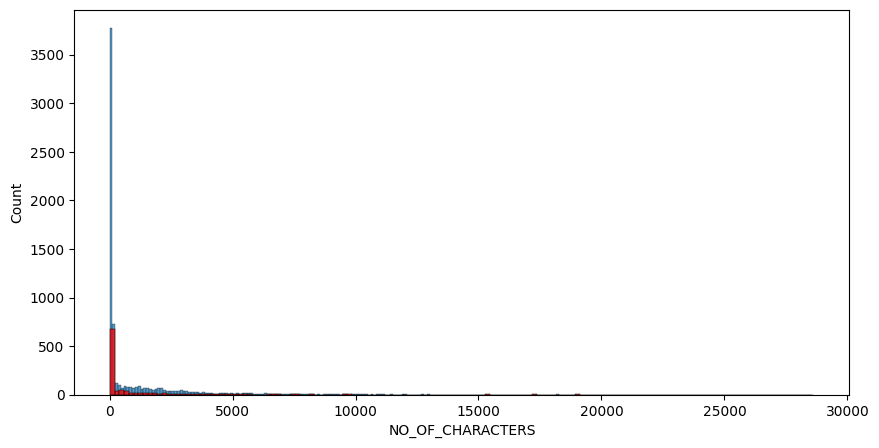

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(merged_df[merged_df['LABEL'] == 0]['NO_OF_CHARACTERS'])
sns.histplot(merged_df[merged_df['LABEL'] == 1]['NO_OF_CHARACTERS'],color='red')

<Axes: xlabel='NO_OF_WORDS', ylabel='Count'>

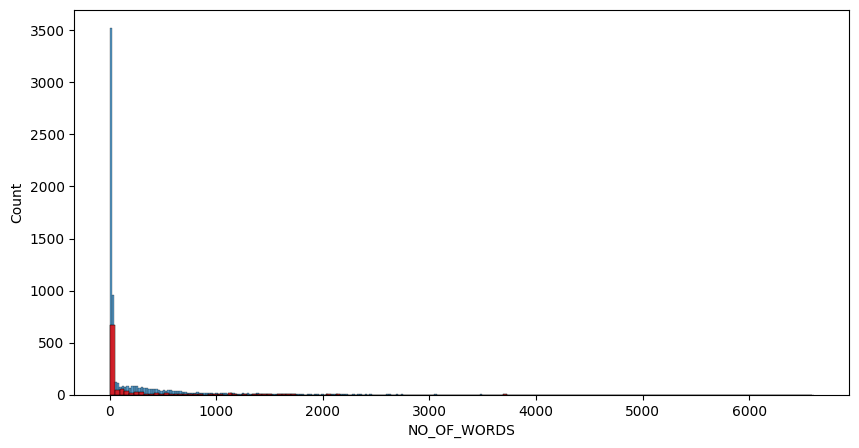

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(merged_df[merged_df['LABEL'] == 0]['NO_OF_WORDS'])
sns.histplot(merged_df[merged_df['LABEL'] == 1]['NO_OF_WORDS'],color='red')

<Axes: xlabel='NO_OF_SENTENCES', ylabel='Count'>

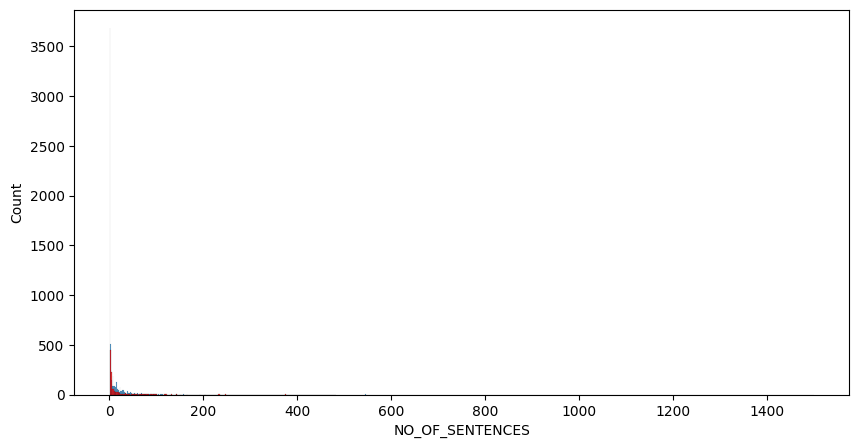

In [44]:
plt.figure(figsize=(10,5))
sns.histplot(merged_df[merged_df['LABEL'] == 0]['NO_OF_SENTENCES'])
sns.histplot(merged_df[merged_df['LABEL'] == 1]['NO_OF_SENTENCES'],color='red')

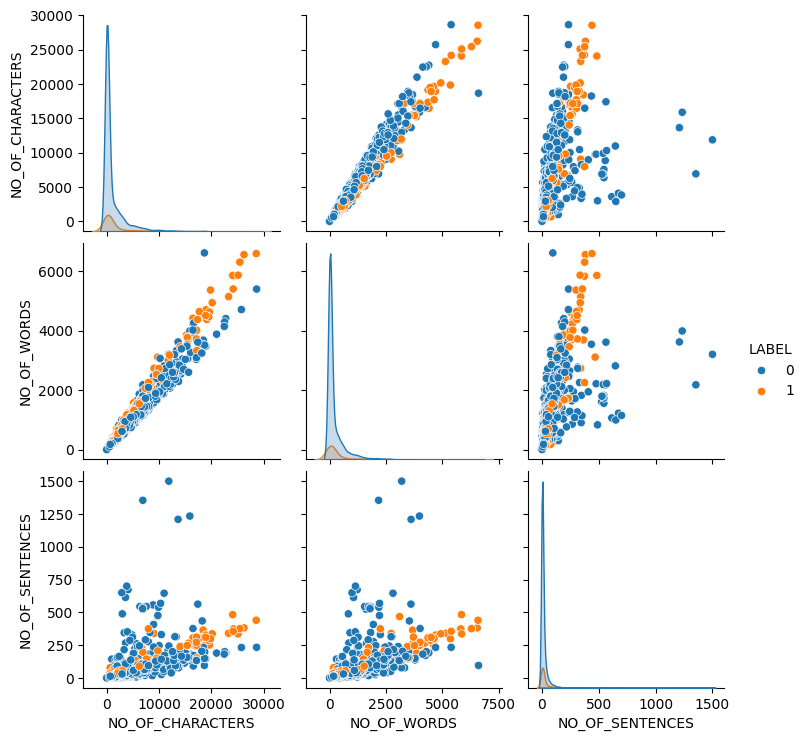

In [45]:
sns.pairplot(merged_df, hue='LABEL')

In [46]:
# Assuming merged_df is your DataFrame
numeric_df = merged_df[['LABEL', 'NO_OF_CHARACTERS', 'NO_OF_WORDS', 'NO_OF_SENTENCES']]

numeric_df.corr()

,LABEL,NO_OF_CHARACTERS,NO_OF_WORDS,NO_OF_SENTENCES
LABEL,1.000000,0.065940,0.096399,0.072914
NO_OF_CHARACTERS,0.065940,1.000000,0.987908,0.689640
NO_OF_WORDS,0.096399,0.987908,1.000000,0.721569
NO_OF_SENTENCES,0.072914,0.689640,0.721569,1.000000


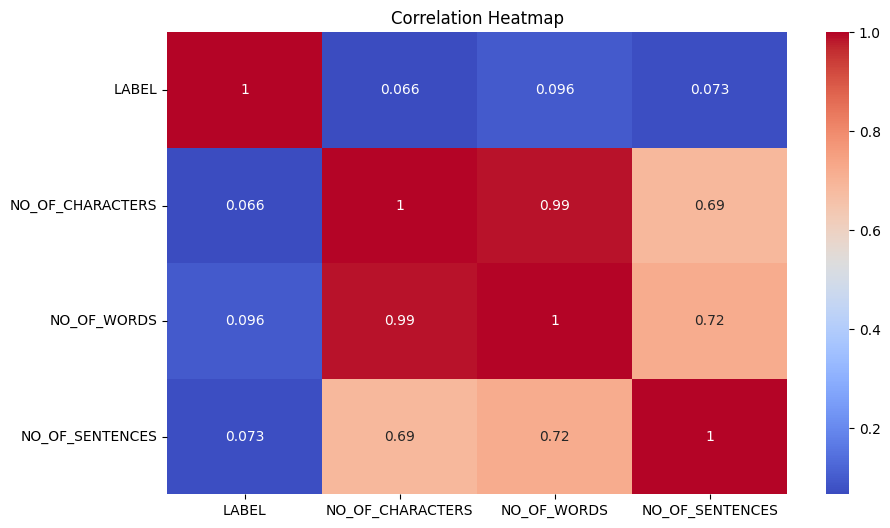

In [47]:
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

**Observations:**

- There is no strong correlation between the "LABEL" and the parameters (NO_OF_CHARACTERS, NO_OF_WORDS, NO_OF_SENTENCES). This lack of strong correlation suggests that these parameters may not be highly predictive of the "LABEL."

- Interestingly, when analyzing pure SMS data separately, there is a correlation between the parameters, indicating some relationship. However, in the case of mixed data (including both SMS and email), this correlation weakens, possibly due to the presence of more email data, which behaves differently from SMS data.

- Given the weak correlations, it may not be meaningful to include these parameters in the model as they may not contribute significantly to predicting the "LABEL."

- The presence of more email data in the mixed dataset could indeed be a factor leading to these weaker correlations, as emails and SMS messages have different characteristics and patterns.

- Further feature selection or exploration may be needed to identify more relevant features for accurately predicting the "LABEL" in this mixed dataset.

### 4.) Text Preprocessing

- Converting the data into lowercase.
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [48]:
import nltk
nltk.download('stopwords')

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords       # Import stopwords from nltk.corpus
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    ps = PorterStemmer()

    for i in text:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))

    return " ".join(y)


transformed_text = transform_text("Please don't text me anymore. I have nothing else to say.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [49]:
merged_df['BODY'][99]

"Please don't text me anymore. I have nothing else to say."

In [50]:
transformed_text = transform_text("Please don't text me anymore. I have nothing else to say.")
print(transformed_text)

pleas text anymor noth els say


In [51]:
merged_df['TRANSFORMED_BODY'] = merged_df['BODY'].apply(transform_text)

In [52]:
merged_df.head()

,LABEL,BODY,NO_OF_CHARACTERS,NO_OF_WORDS,NO_OF_SENTENCES,TRANSFORMED_BODY
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=500,min_font_size=10,background_color='white')

In [54]:
ham_wc = wc.generate(merged_df[merged_df['LABEL'] == 0]['TRANSFORMED_BODY'].str.cat(sep=" "))

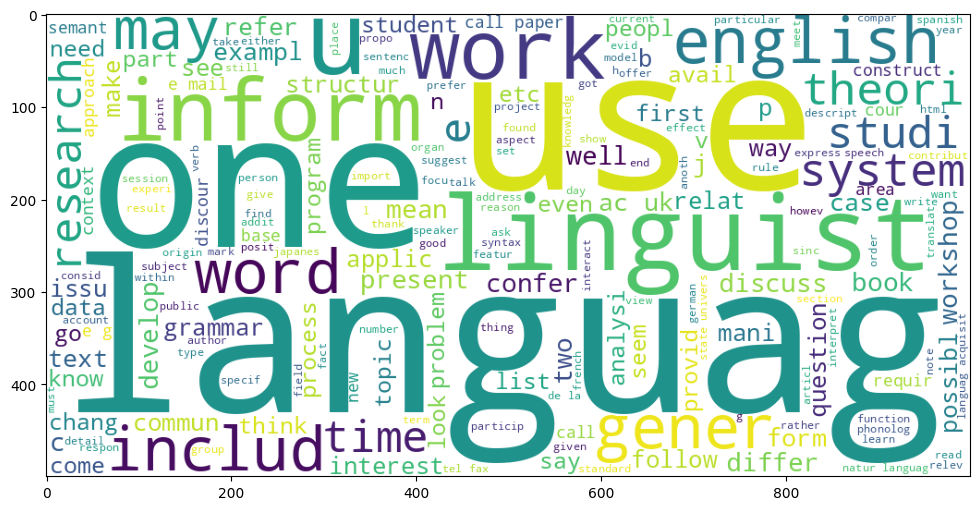

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [56]:
ham_corpus = []
for msg in merged_df[merged_df['LABEL'] == 0]['TRANSFORMED_BODY'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

731047

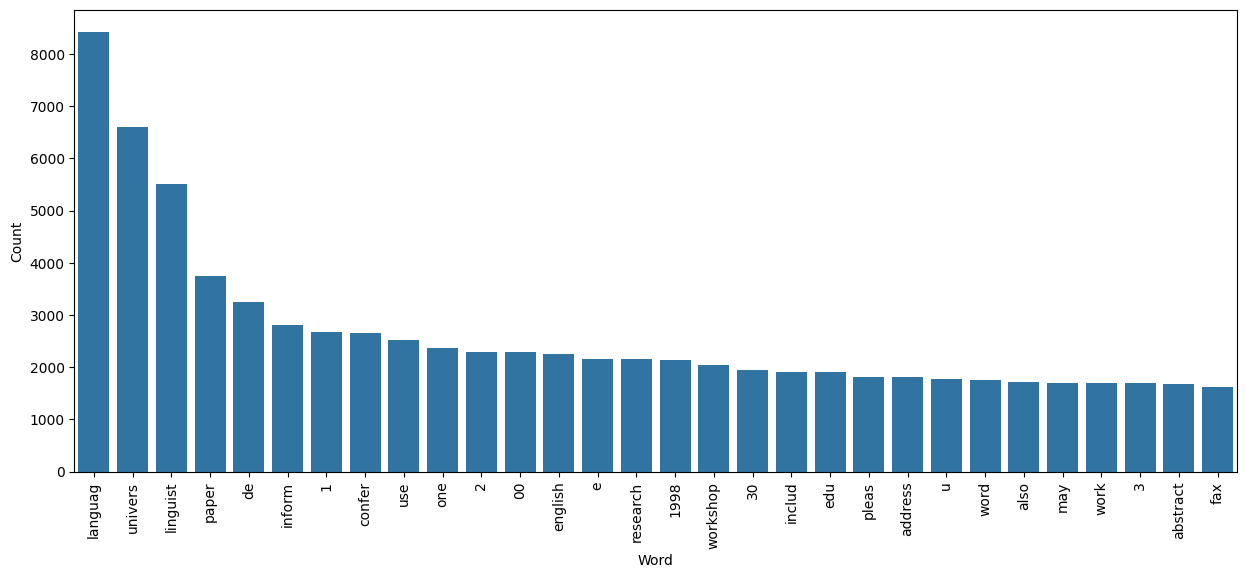

In [58]:
from collections import Counter

# Count the occurrences of each word and get the most common 30 words
word_counts = Counter(ham_corpus)
most_common_words = word_counts.most_common(30)

# Convert the most common words into a DataFrame for plotting
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Word', y='Count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

In [59]:
spam_wc = wc.generate(merged_df[merged_df['LABEL'] == 1]['TRANSFORMED_BODY'].str.cat(sep=" "))

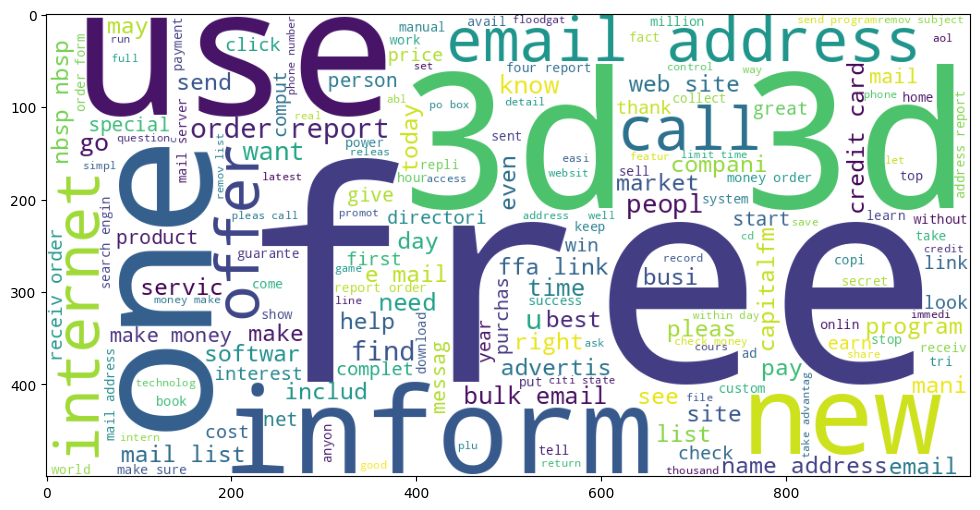

In [60]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [61]:
spam_corpus = []
for msg in merged_df[merged_df['LABEL'] == 1]['TRANSFORMED_BODY'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [62]:
len(spam_corpus)

156358

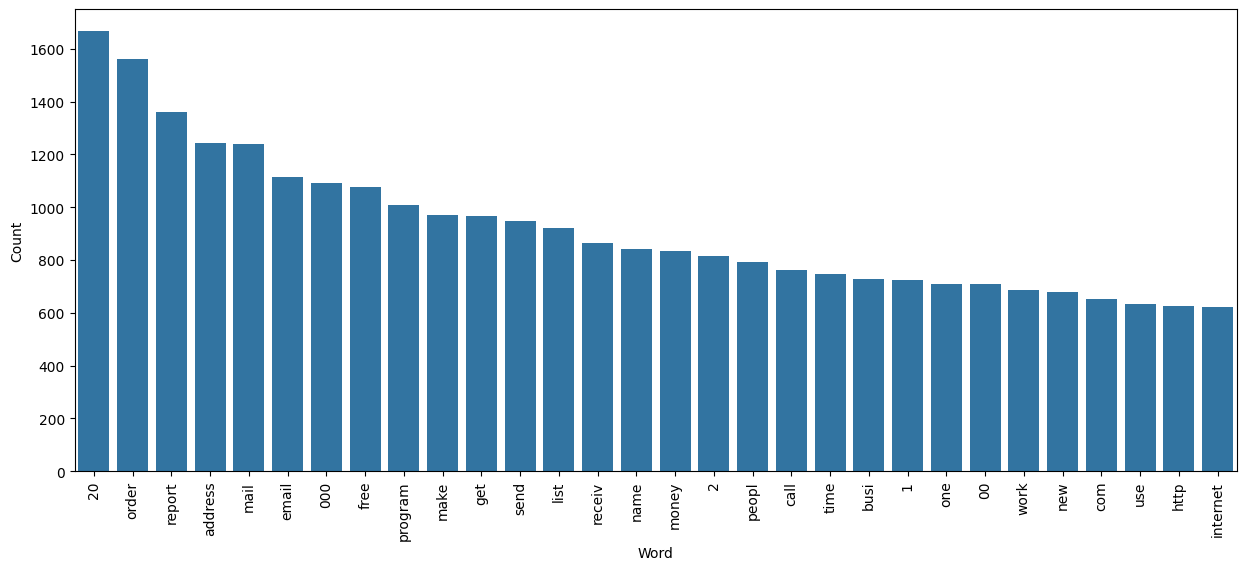

In [63]:
from collections import Counter

# Count the occurrences of each word and get the most common 30 words
word_counts = Counter(spam_corpus)
most_common_words = word_counts.most_common(30)

# Convert the most common words into a DataFrame for plotting
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Word', y='Count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

### 5.) Model Building

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf1 = TfidfVectorizer(max_features=3000)
tfidf2 = TfidfVectorizer()

In [65]:
x1 = tfidf1.fit_transform(merged_df['TRANSFORMED_BODY']).toarray()
x2 = tfidf2.fit_transform(merged_df['TRANSFORMED_BODY']).toarray()

In [66]:
x1.shape

(8028, 3000)

In [67]:
x2.shape

(8028, 50435)

In [68]:
x=[x1,x2]

In [69]:
y = merged_df['LABEL'].values

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define the text vectorizers
tfidf1 = TfidfVectorizer(max_features=3000)
tfidf2 = TfidfVectorizer()

# Transform the text data
x1 = tfidf1.fit_transform(merged_df['TRANSFORMED_BODY']).toarray()
x2 = tfidf2.fit_transform(merged_df['TRANSFORMED_BODY']).toarray()

# Define the labels
y = merged_df['LABEL'].values

# Create a list of datasets
datasets = [(x1, "TFIDF1"), (x2, "TFIDF2")]

# Define function to calculate and print classification metrics
def calculate_metrics(y_true, y_pred, name):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    specificity = tn / (tn + fp)
    tpr = recall
    tnr = specificity
    fpr = 1 - specificity
    fnr = 1 - recall

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall (Sensitivity/TPR): {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Specificity (TNR): {specificity:.2f}")
    print(f"False Positive Rate (FPR): {fpr:.2f}")
    print(f"False Negative Rate (FNR): {fnr:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("=" * 50)

# Loop over your datasets
for dataset, name in datasets:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=2)

    # Initialize the Naive Bayes classifiers
    gnb = GaussianNB()
    mnb = MultinomialNB()
    bnb = BernoulliNB()

    # Define a list of classifiers
    classifiers = [gnb, mnb, bnb]

    # Evaluate and calculate metrics for each classifier on testing data
    for classifier in classifiers:
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        calculate_metrics(y_test, y_pred, f"{name} - {classifier.__class__.__name__} (Testing Data)")

    # Calculate and print metrics for training data
    print(f"Metrics for Training Data ({name}):")
    for classifier in classifiers:
        y_pred_train = classifier.predict(X_train)
        calculate_metrics(y_train, y_pred_train, f"{name} - {classifier.__class__.__name__} (Training Data)")


TFIDF1 - GaussianNB (Testing Data) Metrics:
Accuracy: 0.67
Precision: 0.26
Recall (Sensitivity/TPR): 0.83
F1-Score: 0.40
Specificity (TNR): 0.64
False Positive Rate (FPR): 0.36
False Negative Rate (FNR): 0.17
Confusion Matrix:
[[895 499]
 [ 35 177]]
TFIDF1 - MultinomialNB (Testing Data) Metrics:
Accuracy: 0.97
Precision: 0.98
Recall (Sensitivity/TPR): 0.79
F1-Score: 0.87
Specificity (TNR): 1.00
False Positive Rate (FPR): 0.00
False Negative Rate (FNR): 0.21
Confusion Matrix:
[[1390    4]
 [  45  167]]
TFIDF1 - BernoulliNB (Testing Data) Metrics:
Accuracy: 0.92
Precision: 0.93
Recall (Sensitivity/TPR): 0.46
F1-Score: 0.62
Specificity (TNR): 0.99
False Positive Rate (FPR): 0.01
False Negative Rate (FNR): 0.54
Confusion Matrix:
[[1387    7]
 [ 114   98]]
Metrics for Training Data (TFIDF1):
TFIDF1 - GaussianNB (Training Data) Metrics:
Accuracy: 0.71
Precision: 0.33
Recall (Sensitivity/TPR): 1.00
F1-Score: 0.49
Specificity (TNR): 0.66
False Positive Rate (FPR): 0.34
False Negative Rate (FNR

**Analysis:**
- Among the three Naive Bayes models tested on TFIDF data, MultinomialNB appears to be the most promising choice based on several key metrics.

**TFIDF1 - MultinomialNB (Testing Data) Metrics:**
- **Accuracy:** 97% - This represents the proportion of correctly classified email samples out of the total.
- **Precision:** 98% - When the model predicts an email as spam, it is correct 98% of the time.
- **Recall (Sensitivity/TPR):** 79% - The model identifies 79% of the actual spam emails.
- **F1-Score:** 0.87 - It's a balance between precision and recall. Higher values are better.
- **Specificity (TNR):** 100% - The model correctly identifies all non-spam emails.
- **False Positive Rate (FPR):** 0% - The rate at which non-spam emails are incorrectly classified as spam.
- **False Negative Rate (FNR):** 21% - The rate at which spam emails are incorrectly classified as non-spam.

Now, based on these metrics, it's evident that MultinomialNB with TFIDF1 is the most accurate and precise model among the three. It also has a good balance between recall and precision, making it a promising choice for spam classification.

In summary, MultinomialNB with TFIDF1 is the preferred choice for further analysis due to its high accuracy, precision, recall, and F1-Score.

In [71]:
# TFIDF --> MNB

In [72]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [73]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [74]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'ETC': etc,
}

In [75]:
# Vectorize the text data using TFIDF (assuming you've already defined tfidf1)
X = tfidf1.fit_transform(merged_df['TRANSFORMED_BODY']).toarray()
y = merged_df['LABEL'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize lists to store metrics
metrics = {}

for name, clf in clfs.items():
    # Train the classifier and get predictions for testing data
    y_pred_test = clf.fit(X_train, y_train).predict(X_test)

    # Make predictions on the training data
    y_pred_train = clf.predict(X_train)

    # Calculate metrics for testing data
    testing_accuracy = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    confusion_test = confusion_matrix(y_test, y_pred_test)
    tn_test, fp_test, fn_test, tp_test = confusion_test.ravel()
    sensitivity_test = tp_test / (tp_test + fn_test)
    specificity_test = tn_test / (tn_test + fp_test)
    tpr_test = sensitivity_test
    fpr_test = 1 - specificity_test
    tnr_test = specificity_test
    fnr_test = 1 - sensitivity_test

    # Calculate metrics for training data
    training_accuracy = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    confusion_train = confusion_matrix(y_train, y_pred_train)
    tn_train, fp_train, fn_train, tp_train = confusion_train.ravel()
    sensitivity_train = tp_train / (tp_train + fn_train)
    specificity_train = tn_train / (tn_train + fp_train)
    tpr_train = sensitivity_train
    fpr_train = 1 - specificity_train
    tnr_train = specificity_train
    fnr_train = 1 - sensitivity_train

    # Store metrics in dictionary
    metrics[name] = {
        'Testing Accuracy': testing_accuracy,
        'Testing Precision': precision_test,
        'Testing Recall': recall_test,
        'Testing F1 Score': f1_test,
        'Testing Sensitivity': sensitivity_test,
        'Testing Specificity': specificity_test,
        'Testing TPR': tpr_test,
        'Testing FPR': fpr_test,
        'Testing TNR': tnr_test,
        'Testing FNR': fnr_test,
        'Training Accuracy': training_accuracy,
        'Training Precision': precision_train,
        'Training Recall': recall_train,
        'Training F1 Score': f1_train,
        'Training Sensitivity': sensitivity_train,
        'Training Specificity': specificity_train,
        'Training TPR': tpr_train,
        'Training FPR': fpr_train,
        'Training TNR': tnr_train,
        'Training FNR': fnr_train,
    }

# Print metrics for all classifiers
for name, metric_dict in metrics.items():
    print("Metrics for", name)
    for metric_name, metric_value in metric_dict.items():
        print(metric_name + ":", metric_value)
    print("-" * 50)

Metrics for SVC
Testing Accuracy: 0.9694894146948941
Testing Precision: 0.9312169312169312
Testing Recall: 0.8301886792452831
Testing F1 Score: 0.8778054862842892
Testing Sensitivity: 0.8301886792452831
Testing Specificity: 0.990674318507891
Testing TPR: 0.8301886792452831
Testing FPR: 0.009325681492108995
Testing TNR: 0.990674318507891
Testing FNR: 0.16981132075471694
Training Accuracy: 0.9834942385549673
Training Precision: 0.9725864123957092
Training Recall: 0.9076751946607341
Training F1 Score: 0.9390103567318757
Training Sensitivity: 0.9076751946607341
Training Specificity: 0.9958355965960529
Training TPR: 0.9076751946607341
Training FPR: 0.004164403403947081
Training TNR: 0.9958355965960529
Training FNR: 0.0923248053392659
--------------------------------------------------
Metrics for KN
Testing Accuracy: 0.9028642590286425
Testing Precision: 0.9666666666666667
Testing Recall: 0.27358490566037735
Testing F1 Score: 0.4264705882352941
Testing Sensitivity: 0.27358490566037735
Testin

In [76]:
# Initialize lists to store metrics
metrics = {
    'Algorithm': list(clfs.keys()),
    'Testing Accuracy': [],
    'Testing Precision': [],
    'Testing Recall': [],
    'Testing F1 Score': [],
    'Testing Sensitivity': [],
    'Testing Specificity': [],
    'Testing TPR': [],
    'Testing FPR': [],
    'Testing TNR': [],
    'Testing FNR': [],
    'Training Accuracy': [],
    'Training Precision': [],
    'Training Recall': [],
    'Training F1 Score': [],
    'Training Sensitivity': [],
    'Training Specificity': [],
    'Training TPR': [],
    'Training FPR': [],
    'Training TNR': [],
    'Training FNR': [],
}

for name, clf in clfs.items():
    # ... (Your code for training and evaluating classifiers)

    # Append metrics to the lists
    metrics['Training Accuracy'].append(training_accuracy)
    metrics['Testing Accuracy'].append(testing_accuracy)
    metrics['Testing F1 Score'].append(f1_test)
    metrics['Testing Recall'].append(recall_test)
    metrics['Testing Precision'].append(precision_test)
    metrics['Testing Sensitivity'].append(sensitivity_test)
    metrics['Testing Specificity'].append(specificity_test)
    metrics['Testing FPR'].append(fpr_test)

In [77]:
# Initialize an empty list to store classifier performance
performance_data = []

for name, clf in clfs.items():
    # Split the data into training and testing sets for each classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

    # Train the classifier and get predictions for testing data
    y_pred_test = clf.fit(X_train, y_train).predict(X_test)

    # Make predictions on the training data
    y_pred_train = clf.predict(X_train)

    # Calculate metrics for testing data
    testing_accuracy = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    confusion_test = confusion_matrix(y_test, y_pred_test)
    tn_test, fp_test, fn_test, tp_test = confusion_test.ravel()
    sensitivity_test = tp_test / (tp_test + fn_test)
    specificity_test = tn_test / (tn_test + fp_test)
    tpr_test = sensitivity_test
    fpr_test = 1 - specificity_test
    tnr_test = specificity_test
    fnr_test = 1 - sensitivity_test

    # Calculate metrics for training data
    training_accuracy = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    confusion_train = confusion_matrix(y_train, y_pred_train)
    tn_train, fp_train, fn_train, tp_train = confusion_train.ravel()
    sensitivity_train = tp_train / (tp_train + fn_train)
    specificity_train = tn_train / (tn_train + fp_train)
    tpr_train = sensitivity_train
    fpr_train = 1 - specificity_train
    tnr_train = specificity_train
    fnr_train = 1 - sensitivity_train

    # Append metrics to the performance_data list for this classifier
    performance_data.append({
        'Algorithm': name,
        'Training Accuracy': training_accuracy,
        'Testing Accuracy': testing_accuracy,
        'Testing F1 Score': f1_test,
        'Testing Recall': recall_test,
        'Testing Precision': precision_test,
        'Testing Sensitivity': sensitivity_test,
        'Testing Specificity': specificity_test,
        'Testing FPR': fpr_test,
    })

# Create a DataFrame from the list of performance data
performance_df = pd.DataFrame(performance_data)

# Sort the DataFrame by the desired metrics
performance_df.sort_values(by=['Training Accuracy', 'Testing Accuracy', 'Testing F1 Score', 'Testing Recall', 'Testing Precision', 'Testing Sensitivity', 'Testing Specificity', 'Testing FPR'], ascending=[False, False, False, False, False, False, False, False], inplace=True)

print(performance_df)

  Algorithm  Training Accuracy  Testing Accuracy  Testing F1 Score  \
6       ETC           0.999533          0.970735          0.877922   
5        RF           0.999377          0.971357          0.880208   
0       SVC           0.983494          0.969489          0.877805   
2        NB           0.978200          0.969489          0.872063   
4        LR           0.975864          0.962640          0.844560   
3        DT           0.940984          0.939601          0.728291   
1        KN           0.921053          0.902864          0.426471   

   Testing Recall  Testing Precision  Testing Sensitivity  \
6        0.797170           0.976879             0.797170   
5        0.797170           0.982558             0.797170   
0        0.830189           0.931217             0.830189   
2        0.787736           0.976608             0.787736   
4        0.768868           0.936782             0.768868   
3        0.613208           0.896552             0.613208   
1        0.2

In [78]:
performance_df

,Algorithm,Training Accuracy,Testing Accuracy,Testing F1 Score,Testing Recall,Testing Precision,Testing Sensitivity,Testing Specificity,Testing FPR
6,ETC,0.999533,0.970735,0.877922,0.797170,0.976879,0.797170,0.997131,0.002869
5,RF,0.999377,0.971357,0.880208,0.797170,0.982558,0.797170,0.997848,0.002152
0,SVC,0.983494,0.969489,0.877805,0.830189,0.931217,0.830189,0.990674,0.009326
2,NB,0.978200,0.969489,0.872063,0.787736,0.976608,0.787736,0.997131,0.002869
4,LR,0.975864,0.962640,0.844560,0.768868,0.936782,0.768868,0.992109,0.007891
3,DT,0.940984,0.939601,0.728291,0.613208,0.896552,0.613208,0.989240,0.010760
1,KN,0.921053,0.902864,0.426471,0.273585,0.966667,0.273585,0.998565,0.001435


In [79]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,ETC,Training Accuracy,0.999533
1,RF,Training Accuracy,0.999377
2,SVC,Training Accuracy,0.983494
3,NB,Training Accuracy,0.978200
4,LR,Training Accuracy,0.975864
5,DT,Training Accuracy,0.940984
6,KN,Training Accuracy,0.921053
7,ETC,Testing Accuracy,0.970735
8,RF,Testing Accuracy,0.971357
9,SVC,Testing Accuracy,0.969489


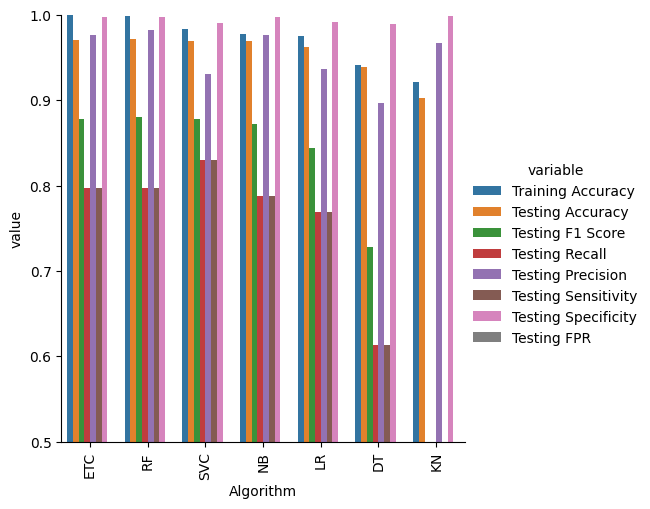

In [80]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### 6.) Model Improvement

In [81]:
# Voting Classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('rf', rfc), ('nb', mnb), ('et', etc)],voting='soft')

In [82]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [83]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Define the number of folds (e.g., k=5)
num_folds = 5

# Initialize the StratifiedKFold cross-validator
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=2)

# Initialize lists to store performance metrics for each fold (training and testing)
train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1_list = []
train_specificity_list = []  # TNR
train_fpr_list = []
train_fnr_list = []

test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1_list = []
test_specificity_list = []  # TNR
test_fpr_list = []
test_fnr_list = []

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train your classification model on X_train and y_train

    # Make predictions on X_train (training data)
    y_train_pred = voting.predict(X_train)

    # Calculate evaluation metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
    train_specificity = tn / (tn + fp)
    train_fpr = 1 - train_specificity
    train_fnr = 1 - train_recall

    # Append metrics to respective training lists
    train_accuracy_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1_list.append(train_f1)
    train_specificity_list.append(train_specificity)
    train_fpr_list.append(train_fpr)
    train_fnr_list.append(train_fnr)

    # Make predictions on X_test (testing data)
    y_test_pred = voting.predict(X_test)

    # Calculate evaluation metrics for testing data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    test_specificity = tn / (tn + fp)
    test_fpr = 1 - test_specificity
    test_fnr = 1 - test_recall

    # Append metrics to respective testing lists
    test_accuracy_list.append(test_accuracy)
    test_precision_list.append(test_precision)
    test_recall_list.append(test_recall)
    test_f1_list.append(test_f1)
    test_specificity_list.append(test_specificity)
    test_fpr_list.append(test_fpr)
    test_fnr_list.append(test_fnr)

# Calculate the mean and standard deviation of the performance metrics for training and testing
mean_train_accuracy = np.mean(train_accuracy_list)
std_train_accuracy = np.std(train_accuracy_list)

mean_train_precision = np.mean(train_precision_list)
std_train_precision = np.std(train_precision_list)

mean_train_recall = np.mean(train_recall_list)
std_train_recall = np.std(train_recall_list)

mean_train_f1 = np.mean(train_f1_list)
std_train_f1 = np.std(train_f1_list)

mean_train_specificity = np.mean(train_specificity_list)
std_train_specificity = np.std(train_specificity_list)

mean_train_fpr = np.mean(train_fpr_list)
std_train_fpr = np.std(train_fpr_list)

mean_train_fnr = np.mean(train_fnr_list)
std_train_fnr = np.std(train_fnr_list)

mean_test_accuracy = np.mean(test_accuracy_list)
std_test_accuracy = np.std(test_accuracy_list)

mean_test_precision = np.mean(test_precision_list)
std_test_precision = np.std(test_precision_list)

mean_test_recall = np.mean(test_recall_list)
std_test_recall = np.std(test_recall_list)

mean_test_f1 = np.mean(test_f1_list)
std_test_f1 = np.std(test_f1_list)

mean_test_specificity = np.mean(test_specificity_list)
std_test_specificity = np.std(test_specificity_list)

mean_test_fpr = np.mean(test_fpr_list)
std_test_fpr = np.std(test_fpr_list)

mean_test_fnr = np.mean(test_fnr_list)
std_test_fnr = np.std(test_fnr_list)

print("Training Metrics:")
print(f"Mean Accuracy: {mean_train_accuracy} ± {std_train_accuracy}")
print(f"Mean Precision: {mean_train_precision} ± {std_train_precision}")
print(f"Mean Recall (Sensitivity/TPR): {mean_train_recall} ± {std_train_recall}")
print(f"Mean F1-Score: {mean_train_f1} ± {std_train_f1}")
print(f"Mean Specificity (TNR): {mean_train_specificity} ± {std_train_specificity}")
print(f"Mean False Positive Rate (FPR): {mean_train_fpr} ± {std_train_fpr}")
print(f"Mean False Negative Rate (FNR): {mean_train_fnr} ± {std_train_fnr}")

print("\nTesting Metrics:")
print(f"Mean Accuracy: {mean_test_accuracy} ± {std_test_accuracy}")
print(f"Mean Precision: {mean_test_precision} ± {std_test_precision}")
print(f"Mean Recall (Sensitivity/TPR): {mean_test_recall} ± {std_test_recall}")
print(f"Mean F1-Score: {mean_test_f1} ± {std_test_f1}")
print(f"Mean Specificity (TNR): {mean_test_specificity} ± {std_test_specificity}")
print(f"Mean False Positive Rate (FPR): {mean_test_fpr} ± {std_test_fpr}")
print(f"Mean False Negative Rate (FNR): {mean_test_fnr} ± {std_test_fnr}")

Training Metrics:
Mean Accuracy: 0.9941454800811453 ± 0.0002532448842273589
Mean Precision: 0.9971978745504957 ± 0.0009306675939615679
Mean Recall (Sensitivity/TPR): 0.960395575553056 ± 0.0020711706372292258
Mean F1-Score: 0.978448994554703 ± 0.0009594843597168627
Mean Specificity (TNR): 0.999566284652371 ± 0.00014456906664831598
Mean False Positive Rate (FPR): 0.00043371534762908225 ± 0.00014456906664831598
Mean False Negative Rate (FNR): 0.03960442444694412 ± 0.0020711706372292258

Testing Metrics:
Mean Accuracy: 0.9941453195377148 ± 0.0010128392195972414
Mean Precision: 0.9972222222222221 ± 0.0037037037037037203
Mean Recall (Sensitivity/TPR): 0.960388639760837 ± 0.008284809482604997
Mean F1-Score: 0.9784300930410307 ± 0.0038354337122469646
Mean Specificity (TNR): 0.9995662650098847 ± 0.0005784004299444243
Mean False Positive Rate (FPR): 0.0004337349901153198 ± 0.0005784004299444242
Mean False Negative Rate (FNR): 0.03961136023916294 ± 0.008284809482604997


In [84]:
# Applying stacking
estimators=[('rf', rfc), ('nb', mnb), ('et', etc)]
final_estimator= LogisticRegression()

from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [85]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [86]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the number of folds (e.g., k=5)
num_folds = 5

# Initialize the StratifiedKFold cross-validator
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=2)

# Initialize lists to store performance metrics for each fold
testing_fold_metrics = []
training_fold_metrics = []

# Initialize lists to store evaluation metrics
precision_test_list = []
recall_test_list = []
f1_test_list = []
specificity_test_list = []  # TNR
fpr_test_list = []
fnr_test_list = []

precision_train_list = []
recall_train_list = []
f1_train_list = []
specificity_train_list = []  # TNR
fpr_train_list = []
fnr_train_list = []

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train your classification model on X_train and y_train
    clf.fit(X_train, y_train)

    # Make predictions on X_test
    y_pred_test = clf.predict(X_test)

    # Make predictions on X_train to calculate training accuracy
    y_pred_train = clf.predict(X_train)

    # Calculate evaluation metrics for testing data
    testing_accuracy = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()
    specificity_test = tn_test / (tn_test + fp_test)
    fpr_test = 1 - specificity_test
    fnr_test = 1 - recall_test

    # Calculate evaluation metrics for training data
    training_accuracy = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train).ravel()
    specificity_train = tn_train / (tn_train + fp_train)
    fpr_train = 1 - specificity_train
    fnr_train = 1 - recall_train

    # Store the evaluation metrics for testing and training data for this fold
    testing_fold_metrics.append(testing_accuracy)
    training_fold_metrics.append(training_accuracy)

    # Store the evaluation metrics in respective lists
    precision_test_list.append(precision_test)
    recall_test_list.append(recall_test)
    f1_test_list.append(f1_test)
    specificity_test_list.append(specificity_test)
    fpr_test_list.append(fpr_test)
    fnr_test_list.append(fnr_test)

    precision_train_list.append(precision_train)
    recall_train_list.append(recall_train)
    f1_train_list.append(f1_train)
    specificity_train_list.append(specificity_train)
    fpr_train_list.append(fpr_train)
    fnr_train_list.append(fnr_train)

# Calculate the mean and standard deviation of the performance metrics
mean_testing_accuracy = np.mean(testing_fold_metrics)
std_testing_accuracy = np.std(testing_fold_metrics)

mean_training_accuracy = np.mean(training_fold_metrics)
std_training_accuracy = np.std(training_fold_metrics)

# Calculate the mean and standard deviation of the evaluation metrics for testing data
mean_precision_test = np.mean(precision_test_list)
std_precision_test = np.std(precision_test_list)

mean_recall_test = np.mean(recall_test_list)
std_recall_test = np.std(recall_test_list)

mean_f1_test = np.mean(f1_test_list)
std_f1_test = np.std(f1_test_list)

mean_specificity_test = np.mean(specificity_test_list)
std_specificity_test = np.std(specificity_test_list)

mean_fpr_test = np.mean(fpr_test_list)
std_fpr_test = np.std(fpr_test_list)

mean_fnr_test = np.mean(fnr_test_list)
std_fnr_test = np.std(fnr_test_list)

# Calculate the mean and standard deviation of the evaluation metrics for training data
mean_precision_train = np.mean(precision_train_list)
std_precision_train = np.std(precision_train_list)

mean_recall_train = np.mean(recall_train_list)
std_recall_train = np.std(recall_train_list)

mean_f1_train = np.mean(f1_train_list)
std_f1_train = np.std(f1_train_list)

mean_specificity_train = np.mean(specificity_train_list)
std_specificity_train = np.std(specificity_train_list)

mean_fpr_train = np.mean(fpr_train_list)
std_fpr_train = np.std(fpr_train_list)

mean_fnr_train = np.mean(fnr_train_list)
std_fnr_train = np.std(fnr_train_list)

# Print the evaluation metrics for testing data
print("Testing Data Metrics:")
print(f"Mean Testing Accuracy: {mean_testing_accuracy} ± {std_testing_accuracy}")
print(f"Mean Precision: {mean_precision_test} ± {std_precision_test}")
print(f"Mean Recall (Sensitivity/TPR): {mean_recall_test} ± {std_recall_test}")
print(f"Mean F1-Score: {mean_f1_test} ± {std_f1_test}")
print(f"Mean Specificity (TNR): {mean_specificity_test} ± {std_specificity_test}")
print(f"Mean False Positive Rate (FPR): {mean_fpr_test} ± {std_fpr_test}")
print(f"Mean False Negative Rate (FNR): {mean_fnr_test} ± {std_fnr_test}")

# Print the evaluation metrics for training data
print("\nTraining Data Metrics:")
print(f"Mean Training Accuracy: {mean_training_accuracy} ± {std_training_accuracy}")
print(f"Mean Precision: {mean_precision_train} ± {std_precision_train}")
print(f"Mean Recall (Sensitivity/TPR): {mean_recall_train} ± {std_recall_train}")
print(f"Mean F1-Score: {mean_f1_train} ± {std_f1_train}")
print(f"Mean Specificity (TNR): {mean_specificity_train} ± {std_specificity_train}")
print(f"Mean False Positive Rate (FPR): {mean_fpr_train} ± {std_fpr_train}")
print(f"Mean False Negative Rate (FNR): {mean_fnr_train} ± {std_fnr_train}")

Testing Data Metrics:
Mean Testing Accuracy: 0.9826852573876004 ± 0.0029860321177649345
Mean Precision: 0.9690605850787384 ± 0.007377391809788034
Mean Recall (Sensitivity/TPR): 0.9037005615480952 ± 0.01568830714119882
Mean F1-Score: 0.935207751454392 ± 0.01139869519255358
Mean Specificity (TNR): 0.9953736327578063 ± 0.0010819636562637998
Mean False Positive Rate (FPR): 0.00462636724219363 ± 0.0010819636562637998
Mean False Negative Rate (FNR): 0.0962994384519048 ± 0.01568830714119882

Training Data Metrics:
Mean Training Accuracy: 0.9989100696156121 ± 9.842133305096639e-05
Mean Precision: 0.9966216164765573 ± 0.0007090187451321395
Mean Recall (Sensitivity/TPR): 0.9954995490428562 ± 0.0007114264326253875
Mean F1-Score: 0.9960598873796129 ± 0.0003557244978685589
Mean Specificity (TNR): 0.9994578574484034 ± 0.00011428543328748453
Mean False Positive Rate (FPR): 0.000542142551596525 ± 0.00011428543328748453
Mean False Negative Rate (FNR): 0.004500450957143865 ± 0.0007114264326253875


In [87]:
import pandas as pd

# Create a dictionary to store the results
results = {
    "Classifier": ["Voting Classifier", "Stacking Classifier"],
    "Mean Training Accuracy": [mean_train_accuracy, mean_training_accuracy],
    "Mean Testing Accuracy": [mean_test_accuracy, mean_testing_accuracy],
    "Mean Precision": [mean_test_precision, mean_precision_test],
    "Mean Recall (Sensitivity)": [mean_test_recall, mean_recall_test],
    "Mean F1-Score": [mean_test_f1, mean_f1_test],
    "Mean Specificity": [mean_test_specificity, mean_specificity_test],
    "Mean False Positive Rate (FPR)": [mean_test_fpr, mean_fpr_test],
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

In [88]:
results_df

,Classifier,Mean Training Accuracy,Mean Testing Accuracy,Mean Precision,Mean Recall (Sensitivity),Mean F1-Score,Mean Specificity,Mean False Positive Rate (FPR)
0,Voting Classifier,0.994145,0.994145,0.997222,0.960389,0.978430,0.999566,0.000434
1,Stacking Classifier,0.998910,0.982685,0.969061,0.903701,0.935208,0.995374,0.004626


In [89]:
results_df1 = pd.melt(results_df, id_vars = "Classifier")
results_df1

,Classifier,variable,value
0,Voting Classifier,Mean Training Accuracy,0.994145
1,Stacking Classifier,Mean Training Accuracy,0.998910
2,Voting Classifier,Mean Testing Accuracy,0.994145
3,Stacking Classifier,Mean Testing Accuracy,0.982685
4,Voting Classifier,Mean Precision,0.997222
5,Stacking Classifier,Mean Precision,0.969061
6,Voting Classifier,Mean Recall (Sensitivity),0.960389
7,Stacking Classifier,Mean Recall (Sensitivity),0.903701
8,Voting Classifier,Mean F1-Score,0.978430
9,Stacking Classifier,Mean F1-Score,0.935208


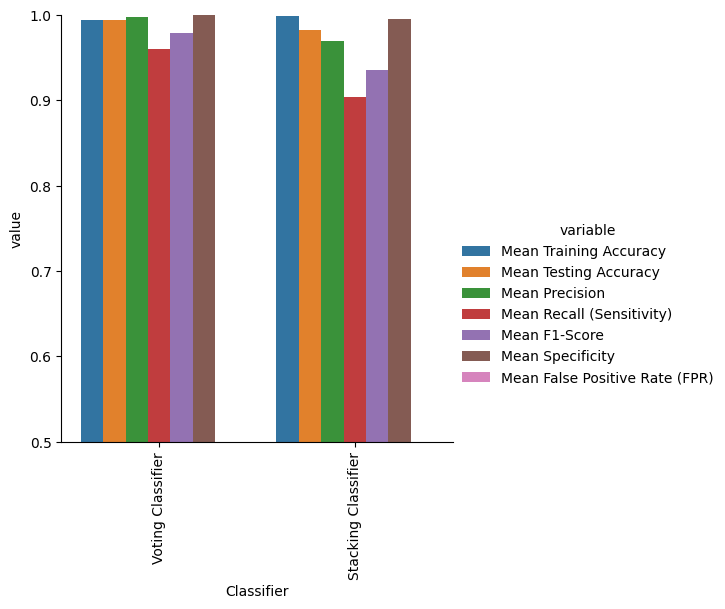

In [90]:
sns.catplot(x = 'Classifier', y='value',
               hue = 'variable',data=results_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

**Conclusions and Future Work:**

- **Classifier Performance:**
  - The Voting Classifier achieved exceptional results with a mean training accuracy and testing accuracy of approximately 99.41%, demonstrating its proficiency in accurately identifying spam emails.
  - The Stacking Classifier exhibited high mean training accuracy (approximately 99.89%) but slightly lower testing accuracy (approximately 98.27%), maintaining a balance between precision and recall.

- **Ensemble Learning Effectiveness:**
  - Both Voting and Stacking Classifiers highlighted the effectiveness of ensemble learning in improving spam email classification by combining multiple base models.

- **Future Directions:**
  - Explore advanced techniques like deep learning (CNNs or RNNs) to enhance spam detection accuracy.
  - Investigate unsupervised learning for feature extraction and subtle pattern recognition in spam emails.
  - Incorporate NLP techniques to analyze email content, including context and semantics.
  - Optimize hyperparameters and threshold values for email notifications to enhance scalability.
  - Continuously update the spam detection system to adapt to evolving spamming techniques.

- **Robustness and Adaptability:**
  - Ensure the long-term effectiveness of the spam detection system through regular updates and enhancements.
  - Consider additional security measures such as data encryption and steganography to protect user data.

- **Hybrid Approaches:**
  - Explore hybrid machine learning and NLP techniques for more robust spam filters.

- **Real-Time Implementation:**
  - Investigate the feasibility of implementing the spam classification model in email clients for real-time protection against spam.

- **Dataset Expansion:**
  - Collect more diverse samples of spam and non-spam emails to improve model generalization and robustness.

In summary, the project demonstrated the power of ensemble classifiers in spam email classification. Future work will focus on improving accuracy, robustness, and real-time implementation while continuously adapting to emerging spamming techniques.

**Applications:**

1. **Email Inbox Filtering**: This project can help automatically sort your emails into different folders, like "Spam" and "Inbox," so you don't have to manually sift through unwanted messages.

2. **Protection from Phishing**: It can identify and move phishing emails to the spam folder, protecting you from fraudulent messages that try to steal your personal information.

3. **Reducing Email Clutter**: By filtering out spam and irrelevant emails, it keeps your inbox clean and ensures you only see important messages.

4. **Saving Time**: You won't waste time opening and deleting spam emails, allowing you to focus on more productive tasks.

5. **Improved Email Security**: Identifying malicious links and attachments in emails can prevent you from falling victim to email-based malware or scams.

6. **Customizable Alerts**: You can set up alerts or notifications for specific types of emails, making sure you never miss important messages.

7. **Better Productivity**: With a well-organized inbox, you can work more efficiently and respond to important emails faster.

8. **User-Friendly Email Experience**: It enhances your overall email experience by making it hassle-free and secure.

9. **Adaptive Learning**: Over time, the system can learn from your actions and improve its accuracy in classifying emails according to your preferences.

10. **Scalable for Organizations**: This project can also be applied to organizational email systems, ensuring that employees receive only relevant and safe emails, reducing the risk of security breaches.